In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline
from sklearn.model_selection import train_test_split as tts

In [2]:
df=pd.read_csv('Downloads/test.csv')

In [3]:
df.shape

(1459, 80)

In [4]:
df.head()
# total features=81 (including SalePrice)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Treating NULL Values (in categorical/numerical values)

In [5]:
# df['MSZoning']=df.groupby('MSZoning')['Id'].count()
df['MSZoning'].head()

0    RH
1    RL
2    RL
3    RL
4    RL
Name: MSZoning, dtype: object

In [6]:
# For Catgorical features
cat_col=[i for i in df.columns if df[i].isnull().sum()>1 and df[i].dtypes=='O'] 
for i in cat_col:
    print('{} has {} null values'.format(i, df[i].isnull().mean()))
# na_col[:3]
# print(type(na_col))


MSZoning has 0.0027416038382453737 null values
Alley has 0.9266620973269363 null values
Utilities has 0.0013708019191226869 null values
MasVnrType has 0.010966415352981495 null values
BsmtQual has 0.03015764222069911 null values
BsmtCond has 0.030843043180260453 null values
BsmtExposure has 0.03015764222069911 null values
BsmtFinType1 has 0.02878684030157642 null values
BsmtFinType2 has 0.02878684030157642 null values
Functional has 0.0013708019191226869 null values
FireplaceQu has 0.5003427004797807 null values
GarageType has 0.0520904729266621 null values
GarageFinish has 0.053461274845784786 null values
GarageQual has 0.053461274845784786 null values
GarageCond has 0.053461274845784786 null values
PoolQC has 0.997943797121316 null values
Fence has 0.8012337217272104 null values
MiscFeature has 0.9650445510623715 null values


In [7]:
df['Id'].dtype

dtype('int64')

In [8]:
for i in cat_col:
#     df[i]=df[i].fillna('missing',inplace=True) is incorrect.Either drop inplace parameter or stop df[i]= something
    df[i].fillna('missing',inplace=True)
    

In [9]:
df[cat_col].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

# Finding and treating null in numerical features

In [10]:
num_col=[i for i in df.columns if df[i].dtype!='O' and df[i].isnull().sum()>1]
df[num_col].shape
# 37 numerical columns

(1459, 5)

In [11]:
for i in num_col:
    print('{} has {} %null'.format(i, df[i].isnull().mean()))

LotFrontage has 0.15558601782042494 %null
MasVnrArea has 0.01028101439342015 %null
BsmtFullBath has 0.0013708019191226869 %null
BsmtHalfBath has 0.0013708019191226869 %null
GarageYrBlt has 0.053461274845784786 %null


In [12]:
for i in num_col:
    df[i].fillna(df[i].median(),inplace=True)
#     filling NA with median

In [13]:
df[i].isnull().mean()

0.0

In [14]:
for i in num_col:
    print('{} has {} %null'.format(i, df[i].isnull().mean()))

LotFrontage has 0.0 %null
MasVnrArea has 0.0 %null
BsmtFullBath has 0.0 %null
BsmtHalfBath has 0.0 %null
GarageYrBlt has 0.0 %null


# handling temporal features 


In [15]:
yr_col=[i for i in df.columns if 'Yr'in i or 'Year' in i]
df[yr_col].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,1961,1961,1961.0,2010
1,1958,1958,1958.0,2010
2,1997,1998,1997.0,2010
3,1998,1998,1998.0,2010
4,1992,1992,1992.0,2010


In [16]:
for i in yr_col:
    if i== 'YrSold':
        pass
    else:
        df[i]=df['YrSold']-df[i]

In [17]:
df[yr_col].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,49,49,49.0,2010
1,52,52,52.0,2010
2,13,12,13.0,2010
3,12,12,12.0,2010
4,18,18,18.0,2010


In [19]:
cont_col=[i for i in df.columns if df[i].dtype!='O' and i not in ('GarageArea') ]



In [21]:
for i in cont_col:
    df[i]=np.log(df[i])

In [22]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.986075,1.097189,RH,1.477511,2.236515,Pave,missing,Reg,Lvl,AllPub,...,1.566007,NaN,missing,MnPrv,missing,NaN,0.583198,2.028923,WD,Normal
1,1.986169,1.097189,RL,1.480342,2.258184,Pave,missing,IR1,Lvl,AllPub,...,NaN,NaN,missing,missing,Gar2,2.244265,0.583198,2.028923,WD,Normal
2,1.986263,1.409607,RL,1.459560,2.254927,Pave,missing,IR1,Lvl,AllPub,...,NaN,NaN,missing,MnPrv,missing,NaN,0.094048,2.028923,WD,Normal
3,1.986356,1.409607,RL,1.471717,2.220088,Pave,missing,IR1,Lvl,AllPub,...,NaN,NaN,missing,missing,missing,NaN,0.583198,2.028923,WD,Normal
4,1.986450,1.566007,RL,1.324738,2.142204,Pave,missing,IR1,HLS,AllPub,...,1.603382,NaN,missing,missing,missing,NaN,-inf,2.028923,WD,Normal


In [ ]:
# Id column should have been excluded fom log normalisation

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [24]:
feature_scale=[i for i in df.columns if i not in ['Id']]


In [25]:
scaler.fit_transform(df[feature_scale])
# scaling done only on numerical data, not on categorical. categorical data need to be transformed into numerical by function, get_dummies. 

ValueError: could not convert string to float: 'RH'

In [27]:
df.groupby('MSZoning')['Id'].mean()
# it gives mean value of ID column for each category of MSZoning column

MSZoning
C (all)    2.043704
FV         2.028063
RH         2.020635
RL         2.037628
RM         2.038831
missing    2.046061
Name: Id, dtype: float64

In [28]:
df.to_csv("cleaned_test_data")

/var/folders/sh/d9vjd14n64q8nfqvd21_knp80000gn/T/ipykernel_42262/3051499252.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df1.corr()


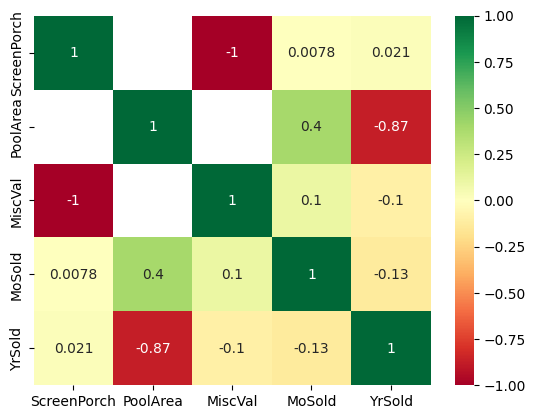

In [36]:
import seaborn as sns
#get correlations of each features in dataset
df1=df.iloc[:,70:]

cor = df1.corr()
# top_corr_features = corrmat.index
# plt.figure(figsize=(20,20))
# #plot heat map
g=sns.heatmap(cor,annot=True,cmap="RdYlGn")